In [1]:
import numpy 
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import numpy as np
import os

from scipy import interpolate

In [2]:
e_file = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites/era_interim.nc'
m_file = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites/modis_merra.nc'

In [54]:
e_ds = xr.open_dataset(e_file)
m_ds = xr.open_dataset(m_file)

In [55]:
print(e_ds)

<xarray.Dataset>
Dimensions:            (x: 30, x_edges: 31, y: 30, y_edges: 31)
Coordinates:
    X                  (x) float64 ...
    Y                  (y) float64 ...
    X_edges            (x_edges) float64 ...
    Y_edges            (y_edges) float64 ...
Dimensions without coordinates: x, x_edges, y, y_edges
Data variables:
    pr_nh_ocean_warm   (x, y) float64 ...
    prw_nh_ocean_warm  (x, y) float64 ...
    ws_nh_ocean_warm   (x, y) float64 ...
    pr_sh_ocean_warm   (x, y) float64 ...
    prw_sh_ocean_warm  (x, y) float64 ...
    ws_sh_ocean_warm   (x, y) float64 ...


In [41]:
e_x = e_ds.X.values
e_y = e_ds.Y.values
print(e_x.shape)
print(e_y.shape)

m_x = m_ds.X.values
m_y = m_ds.Y.values

e_x_grid, e_y_grid = np.meshgrid(e_x, e_y)

m_modis_cld = m_ds.modis_cld.values
m_merra_pw = m_ds.merra_pw.values
m_merra_omega = m_ds.modis_cld.values

(30,)
(30,)


In [50]:
m_x_1d = m_x.flatten()
m_y_1d = m_y.flatten()

m_modis_cld_1d = m_modis_cld.flatten()
m_merra_pw_1d = m_merra_pw.flatten()
m_merra_omega_1d = m_merra_omega.flatten()

e_x_1d = e_x_grid.flatten()
e_y_1d = e_y_grid.flatten()

print(m_x.shape, m_modis_cld.shape)
print(m_y.shape)
print(e_x.shape, e_x_1d.shape)

(25, 25) (25, 25)
(25, 25)
(30,) (900,)


In [51]:
e_modis_cld = interpolate.griddata((m_x_1d, m_y_1d), m_modis_cld_1d, (e_x_1d, e_y_1d))
e_modis_cld = e_modis_cld.reshape(e_x_grid.shape)

e_merra_pw = interpolate.griddata((m_x_1d, m_y_1d), m_merra_pw_1d, (e_x_1d, e_y_1d))
e_merra_pw = e_merra_pw.reshape(e_x_grid.shape)

e_merra_omega = interpolate.griddata((m_x_1d, m_y_1d), m_merra_omega_1d, (e_x_1d, e_y_1d))
e_merra_omega = e_merra_omega.reshape(e_x_grid.shape)


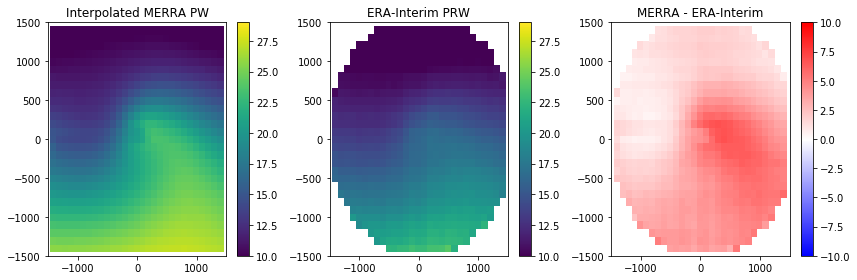

In [82]:
levels = np.arange(10, 30, 1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
# plt.pcolormesh(e_x, e_y, e_merra_pw)
plt.pcolormesh(e_x, e_y, e_merra_pw, vmin=levels[0], vmax=levels[-1])
plt.colorbar()
plt.ylim(-1500, 1500); plt.xlim(-1500, 1500)
plt.title('Interpolated MERRA PW')

plt.subplot(1,3,2)
plt.pcolormesh(e_x, e_y, e_ds.prw_sh_ocean_warm.values, vmin=levels[0], vmax=levels[-1])
plt.colorbar()
plt.ylim(-1500, 1500); plt.xlim(-1500, 1500)
plt.title('ERA-Interim PRW')
plt.tight_layout()

plt.subplot(1,3,3)
plt.pcolormesh(e_x, e_y, e_merra_pw - e_ds.prw_sh_ocean_warm.values, vmin=-10, vmax=10, cmap='bwr')
plt.colorbar()
plt.ylim(-1500, 1500); plt.xlim(-1500, 1500)
plt.title('MERRA - ERA-Interim')
plt.tight_layout()

plt.savefig('diff_test.png', dpi=300.)